In [1]:
import pandas as pd


In [2]:
# read data giving var_name (df)
df=pd.read_csv("housing.csv")

In [3]:
# provides info of top 5 data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# describe the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# checking null values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
# oridnal should be replaced with median and mean
# replacing null value with mean()
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

In [7]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
# rows and cloumns
df.shape

(20640, 10)

In [9]:
# calculates various statistical measures for each numeric column
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
import seaborn as sns

C:\Users\namgy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='total_bedrooms'>

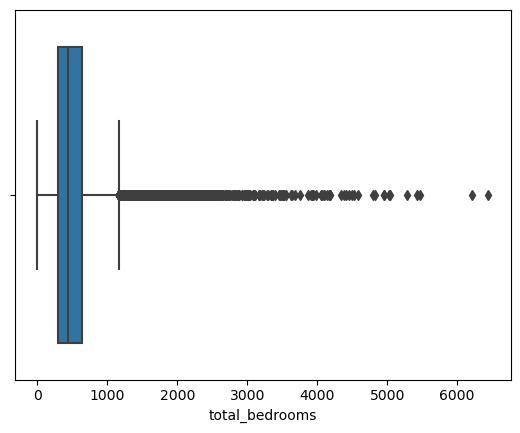

In [11]:
# Handling the outliers
sns.boxplot(x=df['total_bedrooms'])

In [12]:
for cols in df.columns[::]:
    if df[cols].dtype == object:
        continue
    else:
        q1 = df[cols].quantile(q=0.25)
        q3 = df[cols].quantile(q=0.75)
        IQR = q3-q1
    
        low = q1-1.5*(q3-q1)
        high = q3+1.5*(q3-q1)
        df.loc[(df[cols]<low)|(df[cols]>high),cols]=df[cols].median()

C:\Users\namgy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='total_bedrooms'>

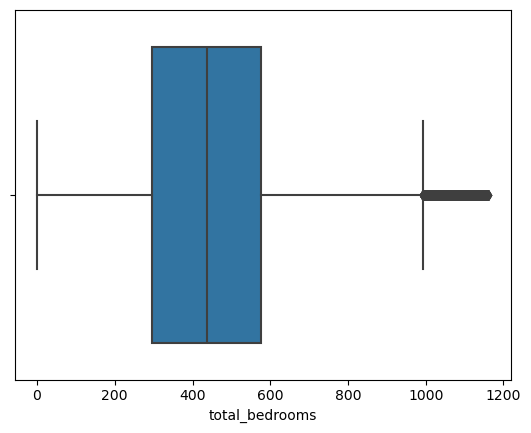

In [13]:
sns.boxplot(x=df['total_bedrooms'])

In [14]:
x = df.drop('total_bedrooms',axis=1)
y = df['total_bedrooms']
x.shape

(20640, 9)

In [15]:
df=pd.get_dummies(df,drop_first=True)
df.shape

(20640, 13)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.hist(bins=50,  figsize=(20,15))
plt.show()

<Axes: >

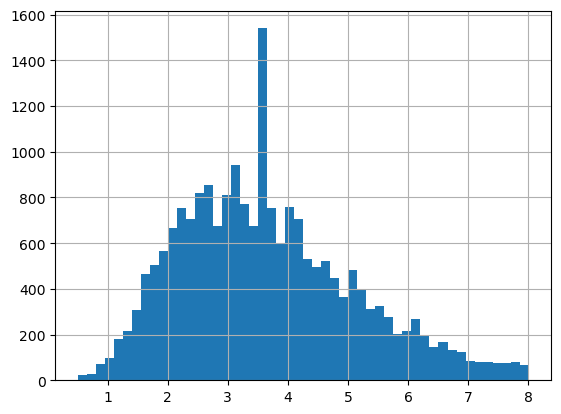

In [19]:
df["median_income"].hist(bins=50)

<Axes: >

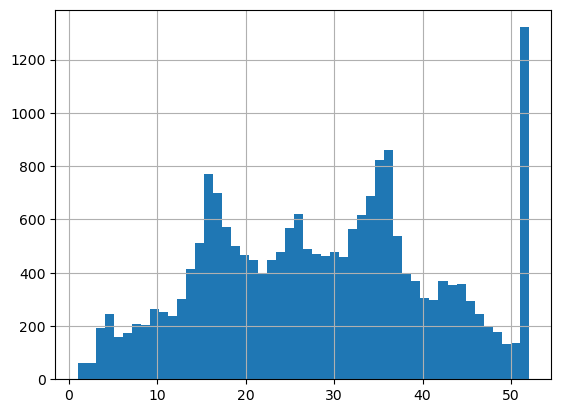

In [20]:
df["housing_median_age"].hist(bins=50)

<Axes: >

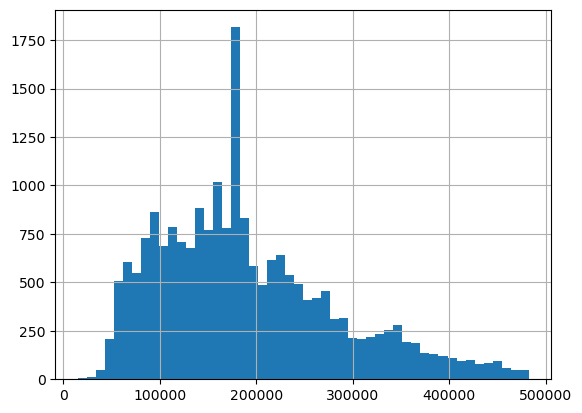

In [21]:
df["median_house_value"].hist(bins=50)

<Axes: >

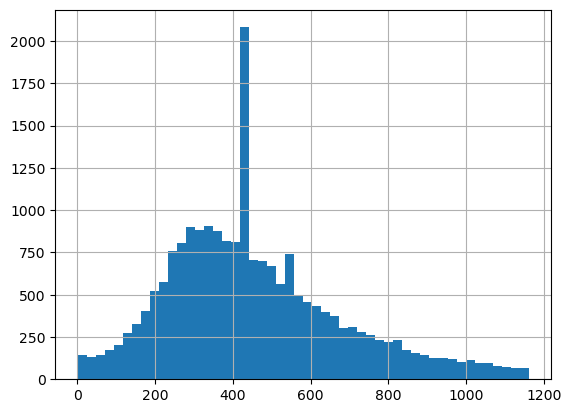

In [22]:
df["total_bedrooms"].hist(bins=50)

<Axes: >

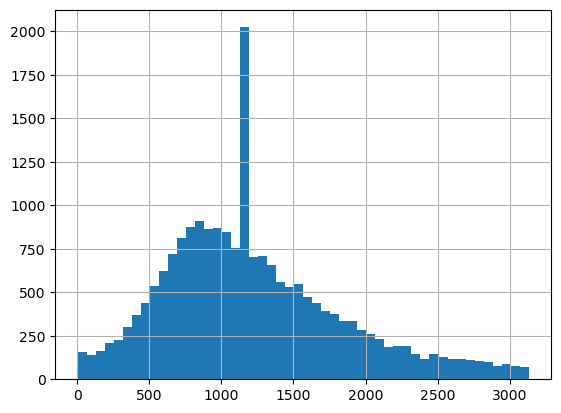

In [23]:
df["population"].hist(bins=50)

In [ ]:
import seaborn as sns

<Axes: >

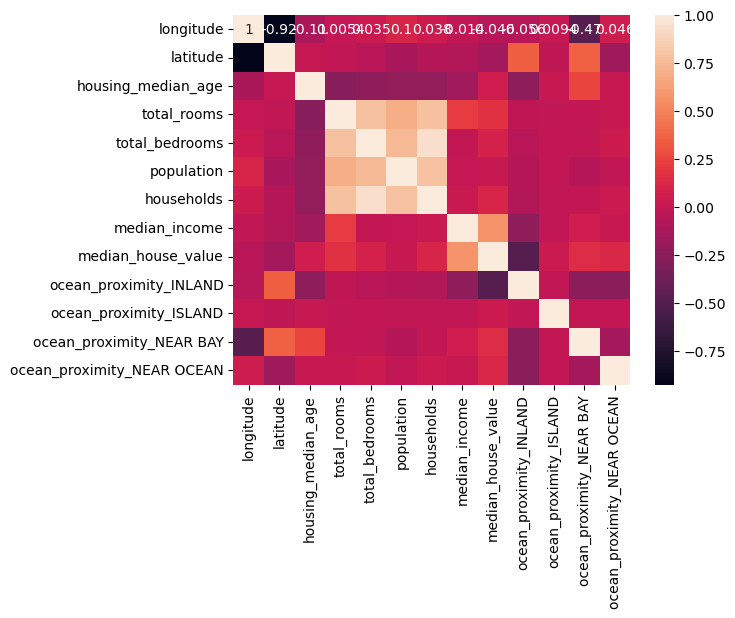

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
df.isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64